In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('../data/train.csv')
df.head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_2490,pixel_2491,pixel_2492,pixel_2493,pixel_2494,pixel_2495,pixel_2496,pixel_2497,pixel_2498,pixel_2499
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
print(f'Количество примеров: {df.shape[0]}')
print(f'Количество признаков: {df.shape[1]}')

Количество примеров: 80213
Количество признаков: 2501


In [11]:
print(f"Столбцы: {df.columns[:10].tolist()} ... {df.columns[-1]}")

Столбцы: ['label', 'pixel_0', 'pixel_1', 'pixel_2', 'pixel_3', 'pixel_4', 'pixel_5', 'pixel_6', 'pixel_7', 'pixel_8'] ... pixel_2499


Файлы данных train.csv (80213 строк) и test.csv (8904 строки) содержат полутоновые изображения нарисованных от руки букв кыргызского языка, от "А" до "Я".
Каждая строка содержит 2501 значений: первое значение - это метка класса (от 1 до 36), остальные 2500 значений - это значения пикселей изображения 50x50. Значения пикселей представлены в виде целых чисел от 0 до 255. 
Обучающий набор данных (train.csv) содержит 2501 столбец. Первый столбец, называемый "label", представляет собой букву, нарисованную пользователем. Остальные столбцы содержат значения в пикселях соответствующего изображения.

In [12]:
kyrgyz_letters = [
    'А', 'Б', 'В', 'Г', 'Д', 'Е', 'Ё', 'Ж', 'З',
    'И', 'Й', 'К', 'Л', 'М', 'Н', 'Ң', 'О', 'Ө',
    'П', 'Р', 'С', 'Т', 'У', 'Ү', 'Ф', 'Х', 'Ц',
    'Ч', 'Ш', 'Щ', 'Ъ', 'Ы', 'Ь', 'Э', 'Ю', 'Я'
]

# Создаём словарь: label → буква
id_to_char = {i + 1: kyrgyz_letters[i] for i in range(36)}
id_to_char

{1: 'А',
 2: 'Б',
 3: 'В',
 4: 'Г',
 5: 'Д',
 6: 'Е',
 7: 'Ё',
 8: 'Ж',
 9: 'З',
 10: 'И',
 11: 'Й',
 12: 'К',
 13: 'Л',
 14: 'М',
 15: 'Н',
 16: 'Ң',
 17: 'О',
 18: 'Ө',
 19: 'П',
 20: 'Р',
 21: 'С',
 22: 'Т',
 23: 'У',
 24: 'Ү',
 25: 'Ф',
 26: 'Х',
 27: 'Ц',
 28: 'Ч',
 29: 'Ш',
 30: 'Щ',
 31: 'Ъ',
 32: 'Ы',
 33: 'Ь',
 34: 'Э',
 35: 'Ю',
 36: 'Я'}

Метка - это целое число от 1 до 36 включительно (1 - A, 2 - B, 3 - V, ..., 36 - Y).

In [13]:
def show_image(index):
    image = df.iloc[index, 1:].values.reshape(50,50)
    label_id = df.iloc[index, 0]
    label_char = id_to_char[label_id]  # Получаем букву по метке
    
    plt.imshow(image, cmap='gray') # Отображаем изображение в серых тонах
    plt.title(f'Метка: {label_id} -> {label_char}')
    plt.axis('off') 
    plt.show()

In [23]:
df[df['label'] == 1].head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_2490,pixel_2491,pixel_2492,pixel_2493,pixel_2494,pixel_2495,pixel_2496,pixel_2497,pixel_2498,pixel_2499
3435,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3436,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3437,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3438,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3439,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


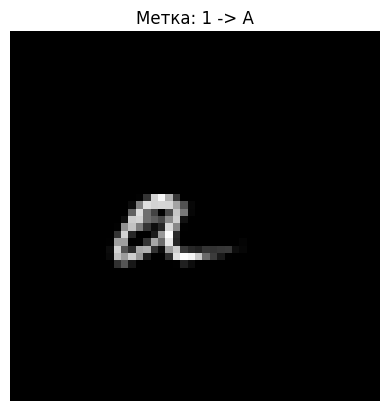

In [22]:
show_image(3435)

In [24]:
df[df['label'] == 7].head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_2490,pixel_2491,pixel_2492,pixel_2493,pixel_2494,pixel_2495,pixel_2496,pixel_2497,pixel_2498,pixel_2499
15434,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15435,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15436,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15437,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15438,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


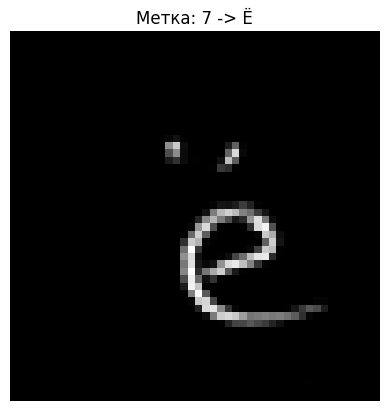

In [25]:
show_image(15434)

In [26]:
df[df['label'] == 16].head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_2490,pixel_2491,pixel_2492,pixel_2493,pixel_2494,pixel_2495,pixel_2496,pixel_2497,pixel_2498,pixel_2499
44717,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44718,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44719,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44720,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
44721,16,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


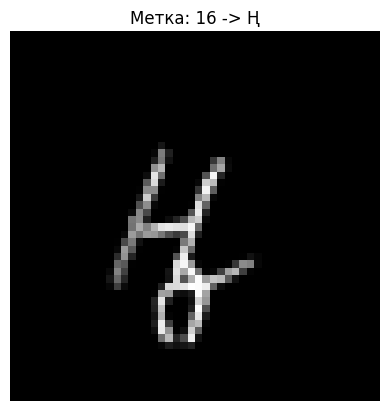

In [27]:
show_image(44717)

In [28]:
df[df['label'] == 18].head()

,label,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,...,pixel_2490,pixel_2491,pixel_2492,pixel_2493,pixel_2494,pixel_2495,pixel_2496,pixel_2497,pixel_2498,pixel_2499
46702,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46703,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46704,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46705,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46706,18,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


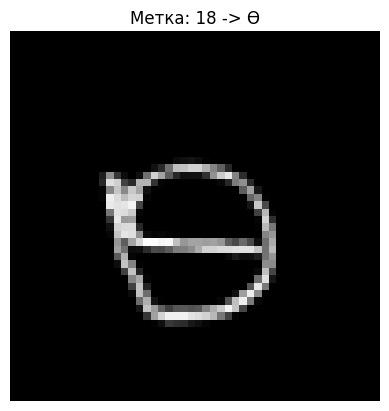

In [29]:
show_image(46702)

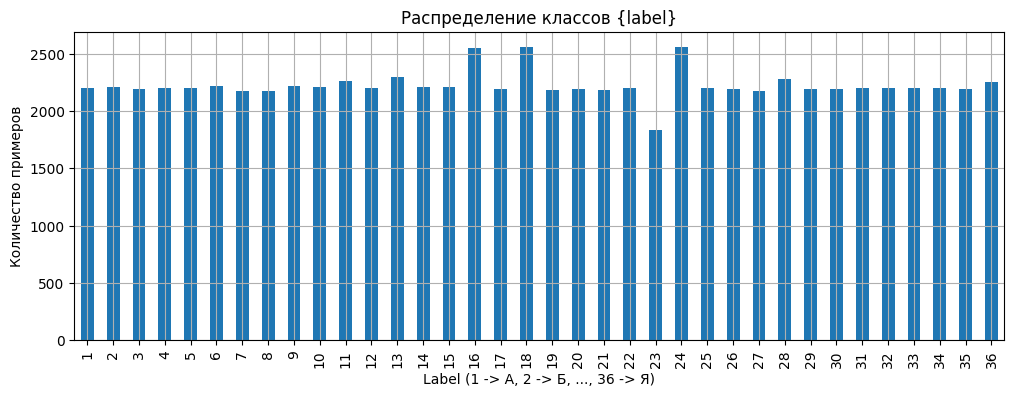

In [30]:
plt.figure(figsize=(12, 4))
df['label'].value_counts().sort_index().plot(kind='bar')
plt.title("Распределение классов {label}")
plt.xlabel('Label (1 -> А, 2 -> Б, ..., 36 -> Я)')
plt.ylabel('Количество примеров')
plt.grid()
plt.show()

Все буквы представлены равномерно.